In [1]:
# https://medium.com/biaslyai/learn-pytorch-basics-6d433f186b7a

In [9]:
import torch
import numpy as np 

In [3]:
# create a tensor
new_tensor = torch.Tensor([[1, 2], [3, 4]])
# create a 2 x 3 tensor with random values
empty_tensor = torch.Tensor(2, 3)
# create a 2 x 3 tensor with random values between -1and 1
uniform_tensor = torch.Tensor(2, 3).uniform_(-1, 1)
# create a 2 x 3 tensor with random values from a uniform distribution on the interval [0, 1)
rand_tensor = torch.rand(2, 3)
# create a 2 x 3 tensor of zeros
zero_tensor = torch.zeros(2, 3)


In [5]:
new_tensor = torch.Tensor([[1, 2], [3, 4]])
# replace an element at position 0, 0
new_tensor[0][0] = 5
print(new_tensor)                 # tensor([[ 5.,  2.],[ 3.,  4.]])
# access an element at position 1, 0
print(new_tensor[1][0])           # tensor([ 3.])
print(new_tensor[1][0].item())    # 3.
## slicing examples
slice_tensor = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# elements from every row, first column
print(slice_tensor[:, 0])         # tensor([ 1.,  4.,  7.])
# elements from every row, last column
print(slice_tensor[:, -1])        # tensor([ 3.,  6.,  9.])
# all elements on the second row
print(slice_tensor[2, :])         # tensor([ 4.,  5.,  6.])
# all elements from first two rows
print(slice_tensor[:2, :])        # tensor([[ 1.,  2.,  3.],[ 4.,  5.,  6.]])


tensor([[5., 2.],
        [3., 4.]])
tensor(3.)
3.0
tensor([1., 4., 7.])
tensor([3., 6., 9.])
tensor([7., 8., 9.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [6]:
new_tensor = torch.Tensor([[1, 2], [3, 4]])
# type of a tensor
print(new_tensor.type())   # 'torch.FloatTensor'
# shape of a tensor
print(new_tensor.shape)    # torch.Size([2, 2])
print(new_tensor.size())   # torch.Size([2, 2])
# dimension of a tensor
print(new_tensor.dim())    # 2


torch.FloatTensor
torch.Size([2, 2])
torch.Size([2, 2])
2


In [7]:
reshape_tensor = torch.Tensor([[1, 2], [3, 4]])
reshape_tensor.view(1,4)   # tensor([[ 1.,  2.,  3.,  4.]])
reshape_tensor.view(4,1)   # tensor([[ 1.],[ 2.],[ 3.],[ 4.]])


tensor([[1.],
        [2.],
        [3.],
        [4.]])

In [10]:
np_ndarray = np.random.randn(2,2)
# NumPy ndarray to PyTorch tensor
to_tensor = torch.from_numpy(np_ndarray)
# PyTorch tensor to NumPy array
to_ndarray = to_tensor.numpy()


In [12]:
tensor_1 = torch.randn(3, 3)
tensor_2 = torch.randn(3, 3)

cross_prod = tensor_1.cross(tensor_2)

# regular transpose function
tensor_1.t()
# transpose via permute function
tensor_2.permute(-1,0)

tensor([[-1.6477,  0.1097, -0.9960],
        [-1.1885,  0.7446,  1.6984],
        [-0.5316,  1.0670, -0.8024]])

In [15]:
maxtrix_prod = tensor_1.mm(tensor_2)
element_mult = tensor_1.mul(tensor_2)

In [16]:
if torch.cuda.is_available():
    tensor_1 = tensor_1.cuda()
    tensor_2 = tensor_2.cuda()
    tensor_1 + tensor_2

In [17]:
# Linear regression using PyTorch
# https://medium.com/biaslyai/pytorch-linear-and-logistic-regression-models-5c5f0da2cb9

In [18]:
from torch.autograd import Variable
from torch.nn import functional as F

In [20]:
x_data = Variable(torch.Tensor([[10.0], [9.0], [3.0], [2.0]]))
y_data = Variable(torch.Tensor([[90.0], [80.0], [50.0], [30.0]]))

In [21]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearRegression()

In [22]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [23]:
for epoch in range(20):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_data)

    # Compute Loss
    loss = criterion(y_pred, y_data)

    # Backward pass
    loss.backward()
    optimizer.step()


In [26]:
new_x = Variable(torch.Tensor([[4.0]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred.data[0][0])

predicted Y value:  tensor(-8.8822e+10)


In [29]:
# Logistic Regression
class LogisticRegression(torch.nn.Module):
     def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

     def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression()

In [30]:
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [31]:
for epoch in range(20):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_data)

    # Compute Loss
    loss = criterion(y_pred, y_data)

    # Backward pass
    loss.backward()
    optimizer.step()

In [32]:
new_x = Variable(torch.Tensor([[4.0]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred.data[0][0])

predicted Y value:  tensor(1.)


In [ ]:
# Feed Forward NN
# https://medium.com/biaslyai/pytorch-introduction-to-neural-network-feedforward-neural-network-model-e7231cff47cb

In [33]:
x = torch.ones(1, requires_grad=True)
print(x.grad)    # returns None since x is a scalar

None


In [34]:
x = torch.ones(1, requires_grad=True)
y = x + 2
z = 2*y**2

z.backward()     # performs backward propagation automatically and calculates the gradient
print(x.grad)    # ∂z/∂x = 12

tensor([12.])


In [35]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(1,1)
        self.relu = torch.nn.ReLU() # instead of Heaviside step fn
        
    def forward(self, x):
        output = self.fc(x)
        output = self.relu(x) # instead of Heaviside step fn
        return output

In [36]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            output = self.sigmoid(output)
            return output

In [37]:
# CREATE RANDOM DATA POINTS
from sklearn.datasets import make_blobs
def blob_label(y, label, loc): # assign labels
    target = np.copy(y)
    for l in loc:
        target[y == l] = label
    return target
x_train, y_train = make_blobs(n_samples=40, n_features=2, cluster_std=1.5, shuffle=True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train, 0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))
x_test, y_test = make_blobs(n_samples=10, n_features=2, cluster_std=1.5, shuffle=True)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(blob_label(y_test, 0, [0]))
y_test = torch.FloatTensor(blob_label(y_test, 1, [1,2,3]))

In [38]:
model = Feedforward(2, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [39]:
model.eval()
y_pred = model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.9190226793289185


In [40]:
model.train()
epoch = 20
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.9796863794326782
Epoch 1: train loss: 0.9480264782905579
Epoch 2: train loss: 0.9216745495796204
Epoch 3: train loss: 0.8997436761856079
Epoch 4: train loss: 0.8814278841018677
Epoch 5: train loss: 0.8659717440605164
Epoch 6: train loss: 0.8527995347976685
Epoch 7: train loss: 0.8413684964179993
Epoch 8: train loss: 0.8313230276107788
Epoch 9: train loss: 0.8223169445991516
Epoch 10: train loss: 0.814171314239502
Epoch 11: train loss: 0.806696891784668
Epoch 12: train loss: 0.7997024655342102
Epoch 13: train loss: 0.7931452989578247
Epoch 14: train loss: 0.7869433164596558
Epoch 15: train loss: 0.7810333967208862
Epoch 16: train loss: 0.7753660678863525
Epoch 17: train loss: 0.7698675990104675
Epoch 18: train loss: 0.7645470499992371
Epoch 19: train loss: 0.7593821287155151


In [41]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.7938277721405029


In [43]:
# Building a Neural Network using PyTorch
# https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a
from torch import nn

In [44]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [45]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [46]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [47]:
# we can also pass an ordered dict to name the layers accordingly
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [48]:
# now we can access the layers either by integer or their names
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


In [55]:
# Training a Neural Network using PyTorch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

In [53]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [57]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
# Define the loss
criterion = nn.NLLLoss()
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Training loss after {0} epochs: {1}".format(e+1,running_loss/len(trainloader)))

Training loss after 0 epochs: 1.9385424915915612
Training loss after 1 epochs: 0.8801150240305898
Training loss after 2 epochs: 0.5423011705755933
Training loss after 3 epochs: 0.4406377552573615
Training loss after 4 epochs: 0.39171836059739085


In [ ]:
# Tutorial from https://www.freecodecamp.org/news/how-to-build-a-neural-network-with-pytorch/

In [58]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

In [59]:
mnist = datasets.MNIST('./data', download=True)

threes = mnist.data[(mnist.targets == 3)]/255.0
sevens = mnist.data[(mnist.targets == 7)]/255.0

len(threes), len(sevens)

9913344it [00:00, 20187034.62it/s]                             
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

29696it [00:00, 10909525.41it/s]         
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

1649664it [00:00, 18916215.75it/s]         
Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

5120it [00:00, 8607148.89it/s]          Downloading http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw




(6131, 6265)

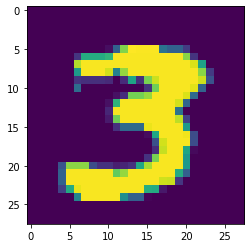

In [60]:
plt.imshow(threes[3])
plt.xticks()
plt.yticks()
plt.show()

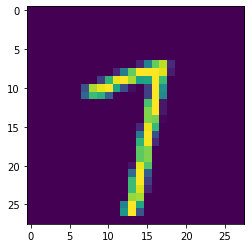

In [61]:
plt.imshow(sevens[3])
plt.xticks()
plt.yticks()
plt.show()

In [62]:
print(threes.shape, sevens.shape)

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])


In [63]:
combined_data = torch.cat([threes, sevens])
combined_data.shape

torch.Size([12396, 28, 28])

In [64]:
flat_imgs = combined_data.view((-1, 28*28))
flat_imgs.shape

torch.Size([12396, 784])

In [65]:
target = torch.tensor([1]*len(threes)+[2]*len(sevens))
target.shape

torch.Size([12396])

In [ ]:
# Train the model

In [66]:
def sigmoid(x): 
    return 1/(1+torch.exp(-x))

def simple_nn(data, weights, bias): 
    return sigmoid((data@weights) + bias)

In [67]:
def error(pred, target): 
    return ((pred-target)**2).mean()

In [70]:
w = torch.randn((flat_imgs.shape[1], 1), requires_grad=True)
b = torch.randn((1, 1), requires_grad=True)

In [72]:
for i in range(2000):
    pred = simple_nn(flat_imgs, w, b)
    loss = error(pred, target.unsqueeze(1))
    loss.backward()
    
    w.data -= 0.001*w.grad.data
    b.data -= 0.001*b.grad.data
    
    w.grad.zero_()
    b.grad.zero_()

print("Loss: ", loss.item())

Loss:  0.9550250172615051
